In [1]:
# clone YOLOv5 repository
!git clone https://github.com/LakshmySanthosh/yolov5_depthwise_separable_conv  # clone repo

Cloning into 'yolov5_depthwise_separable_conv'...
remote: Enumerating objects: 13230, done.
remote: Total 13230 (delta 0), reused 0 (delta 0), pack-reused 13230
Receiving objects: 100% (13230/13230), 14.56 MiB | 22.69 MiB/s, done.
Resolving deltas: 100% (8838/8838), done.


In [2]:
%cd /kaggle/working/yolov5_depthwise_separable_conv/

/kaggle/working/yolov5_depthwise_separable_conv


In [3]:
# install dependencies as necessary
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output  # to display images
from utils.downloads import attempt_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 2.1.2 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15102MB, multi_processor_count=40)


In [4]:
!pip install comet-ml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 638.9/638.9 kB 11.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 514.7/514.7 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 73.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: websocket-client
    Found existing installation: websocket-client 1.7.0
    Uninstalling websocket-client-1.7.0:
      Successfully uninstalled websocket-client-1.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyterlab 4.0.11 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.0.2 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.


In [5]:
%cd /kaggle/working/yolov5_depthwise_seperable_conv

[Errno 2] No such file or directory: '/kaggle/working/depthwise_seperable_conv'
/kaggle/working/yolov5_depthwise_separable_conv


In [6]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="THT9CtDUDzP7TPxM9CuV")
project = rf.workspace("projects-phgy0").project("thz")
version = project.version(4)
dataset = version.download("yolov5")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 31.4 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.12.1
  Attempting uninstall: certifi
    Found existing installation: certifi 20


Extracting Dataset Version Zip to thz-4 in yolov5pytorch:: 100%|██████████| 25924/25924 [00:03<00:00, 8273.25it/s]


In [7]:
%cat {dataset.location}/data.yaml

names:
- A4paper
- AK
- AK_noMagazine
- M16
- axe
- beltholster
- bottle
- candyboxLid
- cigaretteBox
- fomka
- glassjar
- hammerAndSickle
- handGranade
- knife
- meatKnife
- phoneNokia
- phoneXiaomi
- pistol
- saucepanLid
- shoulderholster
- tin
- usbDisk
nc: 22
roboflow:
  license: CC BY 4.0
  project: thz
  url: https://universe.roboflow.com/projects-phgy0/thz/dataset/4
  version: 4
  workspace: projects-phgy0
test: ../test/images
train: thz-4/train/images
val: thz-4/valid/images


In [8]:
# define number of classes based on YAML
import yaml
with open(dataset.location + "/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [9]:
# YOLOv5m model configuration
%cat /kaggle/working/yolov5_depthwise_separable_conv/models/yolov5m.yaml

# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license

# Parameters
nc: 80 # number of classes
depth_multiple: 0.67 # model depth multiple
width_multiple: 0.75 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 

In [10]:
##### train yolov5s on custom data for 25 epochs
%cd /kaggle/working/yolov5_depthwise_separable_conv/
%time !python train.py --img 416 --batch 16 --epochs 25 --data {dataset.location}/data.yaml --cfg ./models/yolov5m.yaml --weights '' --name yolov5m_results  --cache

/kaggle/working/yolov5_depthwise_separable_conv
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-04-03 05:39:26.765865: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-03 05:39:26.765982: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-03 05:39:26.900344: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 


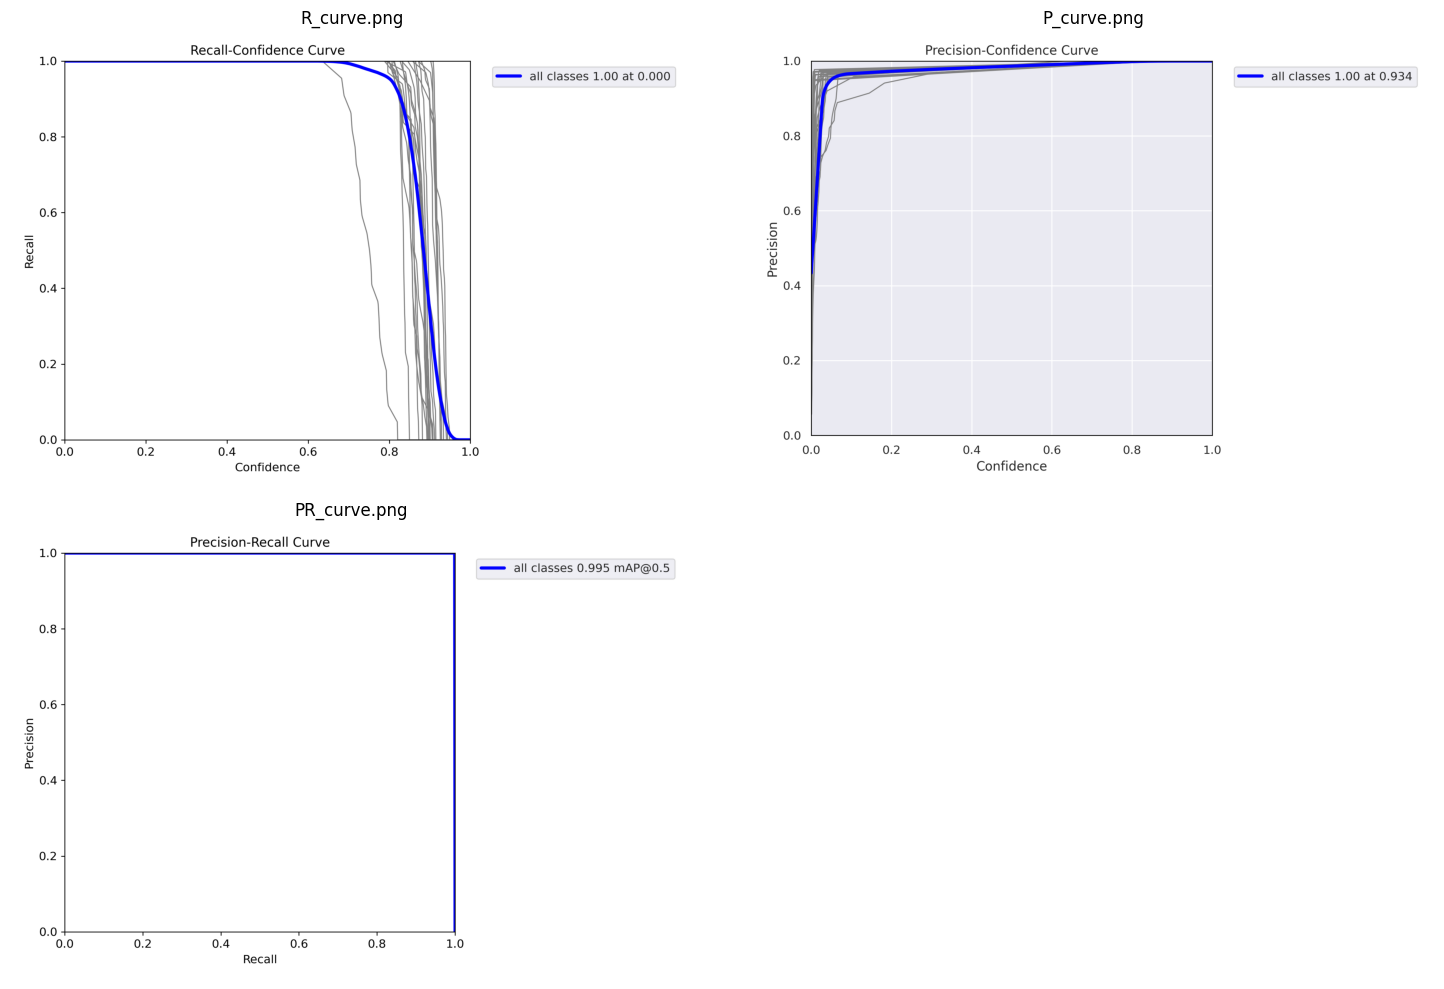

In [12]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_dir = '/kaggle/working/yolov5_depthwise_separable_conv/runs/train/yolov5m_results'
specific_names = ['R_curve.png','P_curve.png','PR_curve.png']  
num_rows = (len(specific_names) + 1) // 2  

plt.figure(figsize=(15, num_rows * 5))  
for i, image_name in enumerate(specific_names):
    image_path = os.path.join(image_dir, image_name)
    if os.path.exists(image_path):
        img = mpimg.imread(image_path)
        plt.subplot(num_rows, 2, i+1) 
        plt.imshow(img)
        plt.title(image_name)
        plt.axis('off')

plt.tight_layout()
plt.show()

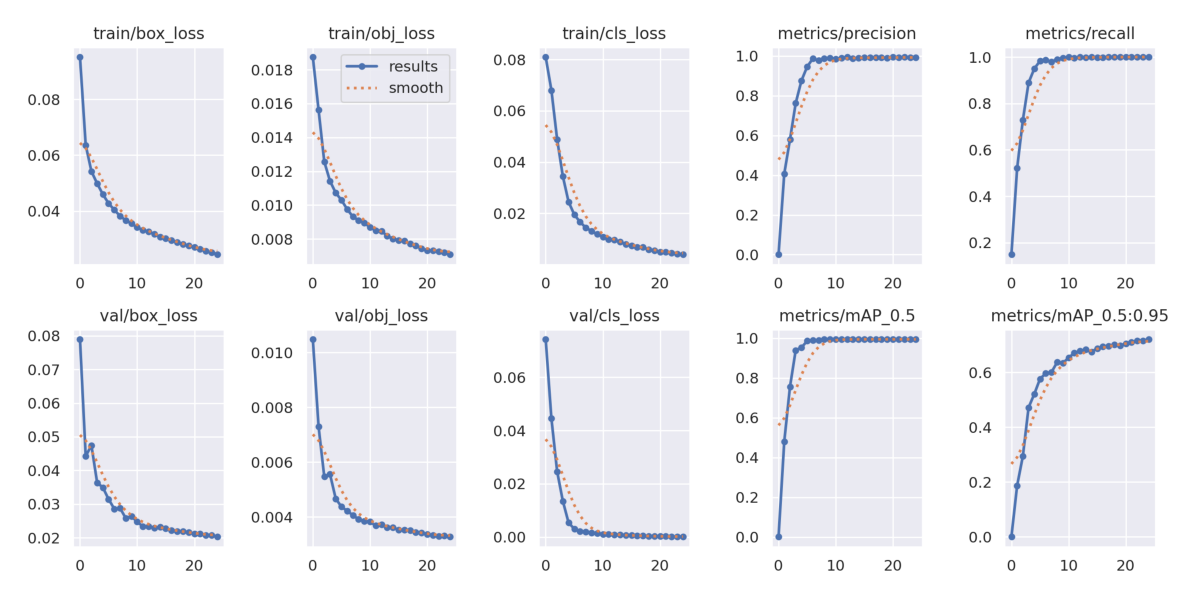

In [13]:
plt.figure(figsize=(15, 15))  
img = mpimg.imread('/kaggle/working/yolov5_depthwise_separable_conv/runs/train/yolov5m_results/results.png')
plt.imshow(img)
plt.axis('off')  
plt.show()

In [19]:
#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [20]:
%%writetemplate /kaggle/working/yolov5_depthwise_separable_conv/models/dw_yolov5m.yaml

# Parameters
nc: {num_classes} # number of classes
depth_multiple: 0.67 # model depth multiple
width_multiple: 0.75 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, DWConv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, DWConv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, DWConv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, DWConv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, DWConv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, DWConv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, DWConv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 4], 1, Concat, [1]], # cat backbone P3
    [-1, 3, C3, [256, False]], # 17 (P3/8-small)

    [-1, 1, DWConv, [256, 3, 2]],
    [[-1, 14], 1, Concat, [1]], # cat head P4
    [-1, 3, C3, [512, False]], # 20 (P4/16-medium)

    [-1, 1, DWConv, [512, 3, 2]],
    [[-1, 10], 1, Concat, [1]], # cat head P5
    [-1, 3, C3, [1024, False]], # 23 (P5/32-large)

    [[17, 20, 23], 1, Detect, [nc, anchors]], # Detect(P3, P4, P5)

In [ ]:
h


In [17]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_dir = '/kaggle/working/yolov5_depthwise_separable_conv/runs/train/yolov5m_results2'
specific_names = ['R_curve.png','P_curve.png','PR_curve.png']  
num_rows = (len(specific_names) + 1) // 2  

plt.figure(figsize=(15, num_rows * 5))  
for i, image_name in enumerate(specific_names):
    image_path = os.path.join(image_dir, image_name)
    if os.path.exists(image_path):
        img = mpimg.imread(image_path)
        plt.subplot(num_rows, 2, i+1) 
        plt.imshow(img)
        plt.title(image_name)
        plt.axis('off')

plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

In [18]:
plt.figure(figsize=(15, 15))  
img = mpimg.imread('/kaggle/working/yolov5_depthwise_separable_conv/runs/train/yolov5m_results2/results.png')
plt.imshow(img)
plt.axis('off')  
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/yolov5_depthwise_separable_conv/runs/train/yolov5m_results2/results.png'

<Figure size 1500x1500 with 0 Axes>